# Least Squares Estimation of Autoregressive models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## AR(1) Model

Estimation of AR(1) process of order 1 using the entire dataset.

In [69]:
np.random.seed(41)            # Seed random number generator
N = 1000                      # Number of datapoints
p = 1                         # AR(1)
a = 1.8 * np.random.rand(p)   # AR parameters
n = np.arange(0, N)           # Generate time series
e = np.sqrt(1.) * np.random.randn(N) + 0  # White noise
y = np.zeros(N)               # Generate stationary AR signal
for i in range(p, N):
    y[i] = e[i]
    for j in range(p):
        y[i] += a[j] * y[i-j-1]
a_hat = np.empty(1,)          # Estimate AR parameters
ymat = np.zeros((N-p, p))     
yb = np.zeros((N-p-1, 1))
for c in range(p, 0, -1):
    ymat[:, p-c] = y[p-c:-c]
yb = y[p:]
a_hat = (np.linalg.pinv(ymat) @ yb)[::-1]
y_hat = np.zeros(N)           # Generate stationary AR signal with estimated parameters
for i in range(p, N):
    y_hat[i] = e[i]
    for k in range(p):
        y_hat[i] += a[k] * y[i-k-1]
print("AR parameters")
print("  Original |  Estimated")
print("-------------------------")
for i in range(len(a)):
    print("{0:10.5f} | {1:10.5f}".format(a[i], a_hat[i]))

AR parameters
  Original |  Estimated
-------------------------
   0.45166 |    0.45348


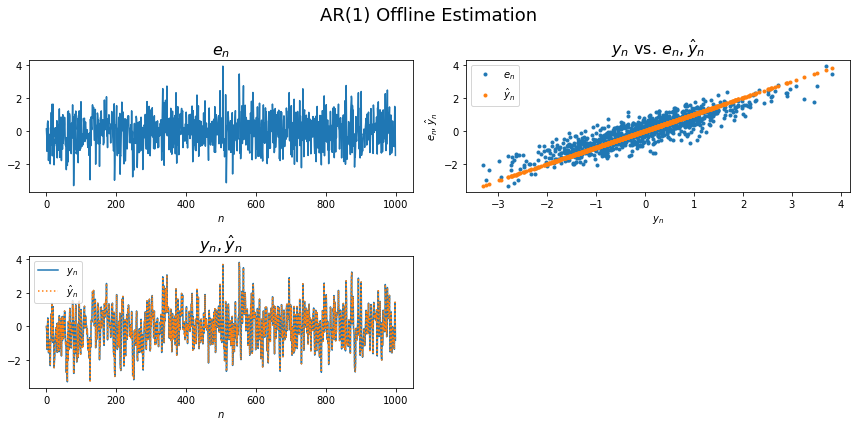

In [73]:
plt.figure(figsize=(12,6))

# plot signal noise
plt.subplot(221)
plt.plot(n, e, label=r"$e_n$")
plt.xlabel("$n$")
plt.title(r'$e_n$', fontsize=16)

# plot observed AR signal (y) with estimated AR signal (y_hat)
plt.subplot(223)
plt.plot(0, 0)
plt.plot(n, y, label=r"$y_n$", color='tab:blue', ls='solid')
plt.plot(n, y_hat, label=r"$\hat{y}_n$", color='tab:orange', ls='dotted')
plt.xlabel("$n$")
plt.legend(loc='best')
plt.title(r"$y_n, \hat{y}_n$", fontsize=16)

# plot predicted points over true points
plt.subplot(222)
plt.plot(y, e, '.', label='$e_n$')
plt.plot(y, y_hat, '.', label='$\hat{y}_n$')
plt.legend(loc='best')
plt.xlabel('$y_n$')
plt.ylabel('$e_n, \hat{y}_n$')
plt.title('$y_n$ vs. $e_n, \hat{y}_n$', fontsize=16)

plt.suptitle('AR(1) Offline Estimation', fontsize=18)
plt.tight_layout()
plt.show()

Source: [Least Square Estimation of AR Models and Whitening - Part I](https://siva82kb.github.io/2018/09/least-square-estimation-of-ar-models-and-whitening-part-i)